In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
import sys
import math
sys.path.insert(1,'numerics_snakemake')
from plot_sfs import *
from matplotlib import pyplot as plt
from power_v2 import *
from plot_expseg import *
import seaborn as sns
import inspect
from scipy import stats
import pandas as pd
import matplotlib.ticker as ticker

In [19]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

colors = sns.color_palette("colorblind", 12)
colors1 = sns.color_palette("magma",3)
colors2 = sns.color_palette("magma",3)

# load data
data = pd.read_csv("numerics_snakemake/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("numerics_snakemake/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

sigma_vals = data['sigma'].tolist()
kappa_list = data['u2_GQ'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [5]:
def finite_sfs_k(n,k,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    beta = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    alpha = shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    logval = k*np.log(n)+alpha*np.log(beta)-(k+alpha)*np.log(n+beta)+loggamma(k+alpha)-loggamma(k+1)-loggamma(alpha)
    return(np.e**logval)

def finite_sfs_allelefreq(n,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    thetae=shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    return thetae/gammae

def finite_sfs_het(n,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    thetae=shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    return (2*thetae/gammae)*(1-(gammae+n+n*thetae)/(n*gammae))

def finite_sfs_segsites(n,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    thetae=shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    return 1-(gammae/(gammae+n))**thetae

def finite_sfs_effort(tau,n,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    thetae=shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    return (gammae*(1-(1-tau)**(1/thetae)))/((1-tau)**(1/thetae))

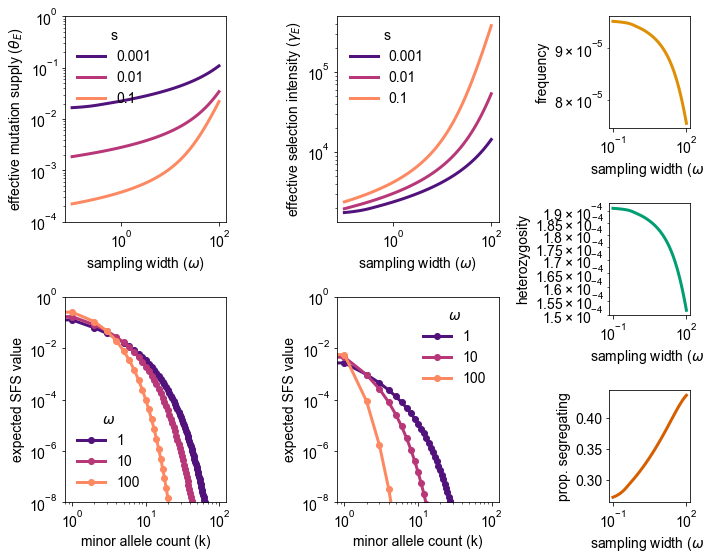

In [25]:
# import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a new figure
fig = plt.figure(figsize=(10, 8))  # Adjusted the figure size to accommodate more spacing

# gs = gridspec.GridSpec(6, 3, width_ratios=[1, 1, 0.5])

# Set up the gridspec with 6 rows
gs = gridspec.GridSpec(6, 3, width_ratios=[1, 1, 0.5])

# Left 2x2 grid (spanning full height)
ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[0:3, 1])
ax3 = fig.add_subplot(gs[3:6, 0])
ax4 = fig.add_subplot(gs[3:6, 1])

# Right 3x1 grid (spanning full height)
ax5 = fig.add_subplot(gs[0:2, 2])
ax6 = fig.add_subplot(gs[2:4, 2])
ax7 = fig.add_subplot(gs[4:6, 2])
# Display the plots

# plt.show()

# fig, ax = plt.subplots()
sigma_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]
ax1.plot(sigma_range,shape_p(s=s_vals[0], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[0])
ax1.plot(sigma_range,shape_p(s=s_vals[1], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[1])
ax1.plot(sigma_range,shape_p(s=s_vals[2], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[2])
ax1.set_xscale("log")
ax1.set_yscale("log")
# ax1.set_title(r"Effective mutation supply ($\theta_E$)")
ax1.set_xlabel(r"sampling width ($\omega$)") 
ax1.set_ylabel(r"effective mutation supply ($\theta_E$)")
ax1.set_ylim(1e-4,1e0)
ax1.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'],loc='upper left')
# ax1.legend(labels=['0.001', '0.01', '0.1'], title="selection coefficient (s)")
# plt.savefig(save_dir+"eff_mut.pdf")

# fig, ax = plt.subplots()
# sigma_range = np.logspace(-1,2,100)
# dim = 2
# N = 10000
# s_vals = [0.001, 0.01, 0.1]
ax2.plot(sigma_range,rate_p(s=s_vals[0], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[0])
ax2.plot(sigma_range,rate_p(s=s_vals[1], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[1])
ax2.plot(sigma_range,rate_p(s=s_vals[2], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[2])
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel(r"effective selection intensity ($\gamma_E$)")
ax2.set_xlabel(r"sampling width ($\omega$)") 
# ax2.set_ylabel(r"$\gamma_E$")
# ax2.set_ylim(1e4,1e7)
# ax.legend(labels=['0.001', '0.01', '0.1'], title="selection coefficient (s)")
# plt.savefig(save_dir+"eff_sel.pdf")
ax2.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'])


nval=10000
sval=0.001
kmax=100
step=1
sg_vals = [1,10,100]
sfs_sg0 = [finite_sfs_k(nval,k,sg_vals[0],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg1 = [finite_sfs_k(nval,k,sg_vals[1],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg2 = [finite_sfs_k(nval,k,sg_vals[2],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# sfs_sg3 = [finite_sfs_k(nval,k,sg_vals[3],sval,sigma_vals,pole_vals,res_vals) for k in range(0,kmax,step)]
# fig,ax = plt.subplots()
ax3.plot(range(0,kmax,step),sfs_sg0,label=str(sg_vals[0]),marker='o',color=colors2[0])
ax3.plot(range(0,kmax,step),sfs_sg1,label=str(sg_vals[1]),marker='o',color=colors2[1])
ax3.plot(range(0,kmax,step),sfs_sg2,label=str(sg_vals[2]),marker='o',color=colors2[2])
# ax.plot(range(0,kmax,step),sfs_sg3,label=str(sg_vals[3]),marker='o',color=colors[3])
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_ylim(1e-8,1e0)
# plt.legend(title=r"$\omega$")
# plt.title("Finite sample SFS, s="+str(sval)+", n="+str(nval))
ax3.set_xlabel("minor allele count (k)")
ax3.set_ylabel("expected SFS value")
# plt.savefig(save_dir+"sfs_finite_s"+str(sval)+"_n"+str(nval)+".pdf")
ax3.legend(title=r"$\omega$",frameon=False)

sval=0.1
sfs_sg0 = [finite_sfs_k(nval,k,sg_vals[0],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg1 = [finite_sfs_k(nval,k,sg_vals[1],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg2 = [finite_sfs_k(nval,k,sg_vals[2],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# sfs_sg3 = [finite_sfs_k(nval,k,sg_vals[3],sval,sigma_vals,pole_vals,res_vals) for k in range(0,kmax,step)]
# fig,ax = plt.subplots()
ax4.plot(range(0,kmax,step),sfs_sg0,label=str(sg_vals[0]),marker='o',color=colors2[0])
ax4.plot(range(0,kmax,step),sfs_sg1,label=str(sg_vals[1]),marker='o',color=colors2[1])
ax4.plot(range(0,kmax,step),sfs_sg2,label=str(sg_vals[2]),marker='o',color=colors2[2])
# ax.plot(range(0,kmax,step),sfs_sg3,label=str(sg_vals[3]),marker='o',color=colors[3])
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(1e-8,1e0)
# plt.legend(title=r"$\omega$")
# plt.title("Finite sample SFS, s="+str(sval)+", n="+str(nval))
ax4.set_xlabel("minor allele count (k)")
ax4.set_ylabel("expected SFS value")
ax4.legend(title=r"$\omega$",frameon=False)

ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[0],sigma_vals,pole_vals,res_vals,N=N),color=colors[1])
# ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[1],sigma_vals,pole_vals,res_vals,N=N),color=colors1[1])
# ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[2],sigma_vals,pole_vals,res_vals,N=N),color=colors1[2])

ax5.set_xscale("log")
ax5.set_yscale("log")
# ax1.set_title(r"Effective mutation supply ($\theta_E$)")
ax5.set_xlabel(r"sampling width ($\omega$)") 
ax5.set_ylabel(r"frequency")
# ax5.set_xlim(1e-4,1e0)
# ax1.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'],loc='upper left')
ax5.set_xticks([1e-1,1e2])
# ax5.set_ylim(1e-7,1e-4)

ax6.plot(sigma_range,finite_sfs_het(nval,sigma_range,s_vals[0],sigma_vals,pole_vals,res_vals,N=N),color=colors[2])
ax6.set_xscale("log")

ax6.set_xlabel(r"sampling width ($\omega$)") 
ax6.set_ylabel(r"heterozygosity")
ax6.set_xticks([1e-1,1e2])
# ax6.set_ylim(1e-4,1e-3)

ax6.set_yscale("log")
# ax6.set_yticks([1e-4,1e-3])

ax7.plot(sigma_range,finite_sfs_segsites(nval,sigma_range,s_vals[0],sigma_vals,pole_vals,res_vals,N=N),color=colors[3])
ax7.set_xscale("log")

ax7.set_xlabel(r"sampling width ($\omega$)") 
ax7.set_ylabel(r"prop. segregating")
ax7.set_xticks([1e-1,1e2])
# ax7.set_yscale("log")


plt.tight_layout()
plt.show()
# plt.savefig("sfs_theory

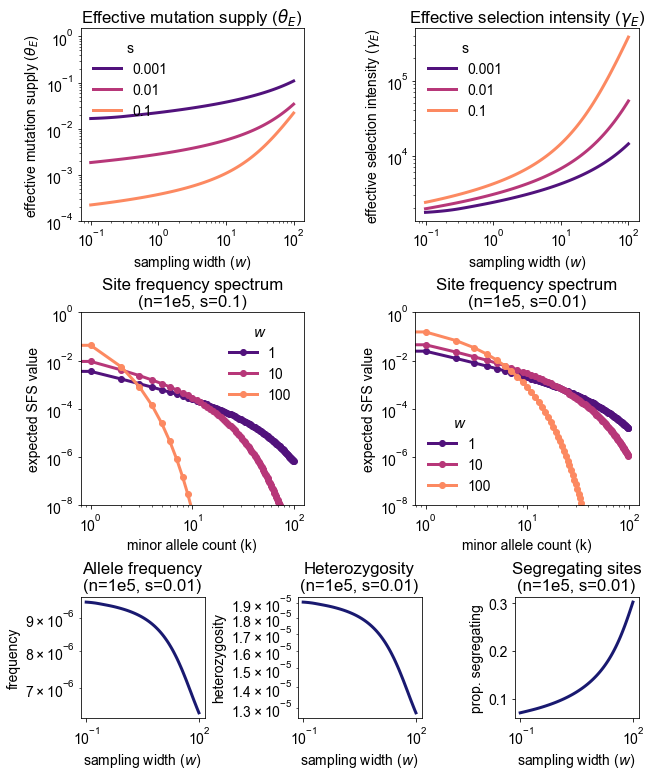

In [31]:
# import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Increase the figure height slightly
fig = plt.figure(figsize=(10, 14))

# Set up the gridspec with 7 rows and 2 columns, adjust hspace
gs = gridspec.GridSpec(11, 2, wspace=0.5,hspace=0.4)

# 2x2 grid occupying 5 rows
ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[0:3, 1])
ax3 = fig.add_subplot(gs[4:7, 0])
ax4 = fig.add_subplot(gs[4:7, 1])

# 1x3 grid below the 2x2 grid
bottom_gs = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[8:10, :],wspace=0.75)

ax5 = fig.add_subplot(bottom_gs[0, 0])
ax6 = fig.add_subplot(bottom_gs[0, 1])
ax7 = fig.add_subplot(bottom_gs[0, 2])

# fig, ax = plt.subplots()
sigma_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]
ax1.plot(sigma_range,shape_p(s=s_vals[0], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[0])
ax1.plot(sigma_range,shape_p(s=s_vals[1], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[1])
ax1.plot(sigma_range,shape_p(s=s_vals[2], sigma=sigma_range, sigma_vals=sigma_vals, res_vals=res_vals,
                    d=dim, N=N), color=colors1[2])
ax1.set_xscale("log")
ax1.set_yscale("log")
# ax1.set_title(r"Effective mutation supply ($\theta_E$)")
ax1.set_xlabel(r"sampling width ($w$)") 
ax1.set_ylabel(r"effective mutation supply ($\theta_E$)")
ax1.set_ylim(1e-4,1.5)
ax1.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'],loc='best')
ax1.set_title(r"Effective mutation supply ($\theta_E$)")
# ax1.legend(labels=['0.001', '0.01', '0.1'], title="selection coefficient (s)")
# plt.savefig(save_dir+"eff_mut.pdf")

# fig, ax = plt.subplots()
# sigma_range = np.logspace(-1,2,100)
# dim = 2
# N = 10000
# s_vals = [0.001, 0.01, 0.1]
ax2.plot(sigma_range,rate_p(s=s_vals[0], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[0])
ax2.plot(sigma_range,rate_p(s=s_vals[1], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[1])
ax2.plot(sigma_range,rate_p(s=s_vals[2], sigma=sigma_range, sigma_vals=sigma_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=colors1[2])
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel(r"effective selection intensity ($\gamma_E$)")
ax2.set_xlabel(r"sampling width ($w$)") 
ax2.set_title(r"Effective selection intensity ($\gamma_E$)")
# ax2.set_ylabel(r"$\gamma_E$")
# ax2.set_ylim(1e4,1e7)
# ax.legend(labels=['0.001', '0.01', '0.1'], title="selection coefficient (s)")
# plt.savefig(save_dir+"eff_sel.pdf")
ax2.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'])


nval=100000
sval=0.1
kmax=100
step=1
sg_vals = [1,10,100]
sfs_sg0 = [finite_sfs_k(nval,k,sg_vals[0],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg1 = [finite_sfs_k(nval,k,sg_vals[1],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg2 = [finite_sfs_k(nval,k,sg_vals[2],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# sfs_sg3 = [finite_sfs_k(nval,k,sg_vals[3],sval,sigma_vals,pole_vals,res_vals) for k in range(0,kmax,step)]
# fig,ax = plt.subplots()
ax3.plot(range(0,kmax,step),sfs_sg0,label=str(sg_vals[0]),marker='o',color=colors2[0],linewidth=3,markersize=6)
ax3.plot(range(0,kmax,step),sfs_sg1,label=str(sg_vals[1]),marker='o',color=colors2[1],linewidth=3,markersize=6)
ax3.plot(range(0,kmax,step),sfs_sg2,label=str(sg_vals[2]),marker='o',color=colors2[2],linewidth=3,markersize=6)
# ax.plot(range(0,kmax,step),sfs_sg3,label=str(sg_vals[3]),marker='o',color=colors[3])
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_ylim(1e-8,1e0)
# plt.legend(title=r"$\omega$")
# plt.title("Finite sample SFS, s="+str(sval)+", n="+str(nval))
ax3.set_xlabel("minor allele count (k)")
ax3.set_ylabel("expected SFS value")
# plt.savefig(save_dir+"sfs_finite_s"+str(sval)+"_n"+str(nval)+".pdf")
ax3.legend(title=r"$w$",frameon=False)
ax3.set_title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")

sval=0.01
sfs_sg0 = [finite_sfs_k(nval,k,sg_vals[0],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg1 = [finite_sfs_k(nval,k,sg_vals[1],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_sg2 = [finite_sfs_k(nval,k,sg_vals[2],sval,sigma_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# sfs_sg3 = [finite_sfs_k(nval,k,sg_vals[3],sval,sigma_vals,pole_vals,res_vals) for k in range(0,kmax,step)]
# fig,ax = plt.subplots()
ax4.plot(range(0,kmax,step),sfs_sg0,label=str(sg_vals[0]),marker='o',color=colors2[0],linewidth=3,markersize=6)
ax4.plot(range(0,kmax,step),sfs_sg1,label=str(sg_vals[1]),marker='o',color=colors2[1],linewidth=3,markersize=6)
ax4.plot(range(0,kmax,step),sfs_sg2,label=str(sg_vals[2]),marker='o',color=colors2[2],linewidth=3,markersize=6)
# ax.plot(range(0,kmax,step),sfs_sg3,label=str(sg_vals[3]),marker='o',color=colors[3])
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(1e-8,1e0)
# plt.legend(title=r"$\omega$")
# plt.title("Finite sample SFS, s="+str(sval)+", n="+str(nval))
ax4.set_title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")
ax4.set_xlabel("minor allele count (k)")
ax4.set_ylabel("expected SFS value")
ax4.legend(title=r"$w$",frameon=False)

ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[1],sigma_vals,pole_vals,res_vals,N=N),color='midnightblue')
# ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[1],sigma_vals,pole_vals,res_vals,N=N),color=colors1[1])
# ax5.plot(sigma_range,finite_sfs_allelefreq(nval,sigma_range,s_vals[2],sigma_vals,pole_vals,res_vals,N=N),color=colors1[2])

ax5.set_xscale("log")
ax5.set_yscale("log")
# ax1.set_title(r"Effective mutation supply ($\theta_E$)")
ax5.set_xlabel(r"sampling width ($w$)") 
ax5.set_ylabel(r"frequency")
# ax5.set_xlim(1e-4,1e0)
# ax1.legend(title="s",frameon=False,labels=['0.001', '0.01', '0.1'],loc='upper left')
ax5.set_xticks([1e-1,1e2])
# ax5.set_ylim(1e-7,1e-4)
ax5.set_title("Allele frequency\n(n=1e5, s="+str(s_vals[1])+")")

ax6.plot(sigma_range,finite_sfs_het(nval,sigma_range,s_vals[1],sigma_vals,pole_vals,res_vals,N=N),color='midnightblue')
ax6.set_xscale("log")

ax6.set_xlabel(r"sampling width ($w$)") 
ax6.set_ylabel(r"heterozygosity")
ax6.set_xticks([1e-1,1e2])
ax6.set_title("Heterozygosity\n(n=1e5, s="+str(s_vals[1])+")")
# ax6.set_ylim(1e-4,1e-3)
# ax6.get_yaxis().get_major_formatter().set_useOffset(False)
# ax6.get_yaxis().get_major_formatter().set_scientific(False)

ax6.set_yscale("log")
# ax6.set_yticks([1e-4,1e-3])

ax7.plot(sigma_range,finite_sfs_segsites(nval,sigma_range,s_vals[1],sigma_vals,pole_vals,res_vals,N=N),color='midnightblue')
ax7.set_xscale("log")

ax7.set_xlabel(r"sampling width ($w$)") 
ax7.set_ylabel(r"prop. segregating")
ax7.set_xticks([1e-1,1e2])
ax7.set_title("Segregating sites\n(n=1e5, s="+str(s_vals[1])+")")
# ax7.set_yscale("log")


# plt.tight_layout()
# plt.show()
plt.savefig("sfs_theory_fig.pdf")

In [70]:
# def finite_sfs_allelefreq(n,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
#     gammae = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
#     thetae=shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
#     return thetae/gammae

# finite_sfs_allelefreq(nval,sigma_range,s_vals[0],sigma_vals,pole_vals,res_vals,N=N)

array([9.56866236e-05, 9.56760104e-05, 9.56647218e-05, 9.56527216e-05,
       9.56399722e-05, 9.56264354e-05, 9.56120718e-05, 9.55968417e-05,
       9.55807046e-05, 9.55636201e-05, 9.55455474e-05, 9.55264462e-05,
       9.55062767e-05, 9.54850000e-05, 9.54625784e-05, 9.54389761e-05,
       9.54141594e-05, 9.53880972e-05, 9.53600121e-05, 9.53267289e-05,
       9.52923864e-05, 9.52544423e-05, 9.52114663e-05, 9.51607977e-05,
       9.51087116e-05, 9.50502825e-05, 9.49851228e-05, 9.49179496e-05,
       9.48475992e-05, 9.47756470e-05, 9.47024848e-05, 9.46280080e-05,
       9.45541319e-05, 9.44796901e-05, 9.44045480e-05, 9.43293261e-05,
       9.42531921e-05, 9.41748904e-05, 9.40940773e-05, 9.40108156e-05,
       9.39243591e-05, 9.38345679e-05, 9.37413217e-05, 9.36444835e-05,
       9.35435540e-05, 9.34409712e-05, 9.33367758e-05, 9.32283740e-05,
       9.31166013e-05, 9.30015997e-05, 9.28831724e-05, 9.27604402e-05,
       9.26330099e-05, 9.25009800e-05, 9.23643132e-05, 9.22229301e-05,
      